In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#data='/content/drive/MyDrive/COCOHorseSleapPose/Updata.csv'
data='/content/Tray164.csv'
df = pd.read_csv(data)

In [ ]:
df.shape

(7810, 193)

In [ ]:
#for i in range(0,46):
#  df[df.columns[i]]=df[df.columns[i]].interpolate(methods='linear',limit_direction='both')

#df

In [ ]:
df=df.fillna(value=-1)
df

,Elbow_Left_X,Elbow_Left_Y,Mouth_Back_Left_X,Mouth_Back_Left_Y,Head_Mid_Top_X,Head_Mid_Top_Y,Mouth_Back_Right_X,Mouth_Back_Right_Y,Knee_Left_X,Knee_Left_Y,...,AC135,AC136,AC137,AC138,AC139,AC140,AC141,AC142,AC143,AC144
0,104.139679,325.075928,-1.0,-1.0,128.574951,57.189270,-1.0,-1.0,184.139526,332.459229,...,0,0,0,0,0,0,0,0,0,0
1,115.922638,327.997528,-1.0,-1.0,124.315826,56.024841,-1.0,-1.0,176.399780,340.395050,...,0,0,0,0,0,0,0,0,0,0
2,117.071671,324.612488,-1.0,-1.0,125.189728,56.183884,-1.0,-1.0,177.687714,344.317566,...,0,0,0,0,0,0,0,0,0,0
3,136.452759,315.592346,-1.0,-1.0,120.604019,55.201263,-1.0,-1.0,184.897964,336.024109,...,0,0,0,0,0,0,0,0,0,0
4,-1.000000,-1.000000,-1.0,-1.0,96.864517,52.384766,-1.0,-1.0,144.741913,307.945831,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805,324.232147,284.471069,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,0,0,0,0,0,0,0,0,0,0
7806,324.464264,286.000122,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,327.471680,289.754089,...,0,0,0,0,0,0,0,0,0,0
7807,328.685669,285.722534,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,331.633057,288.595337,...,0,0,0,0,0,0,0,0,0,0
7808,328.300598,284.809143,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,327.955841,285.862366,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
Nodes = df.iloc[:,:-147].T.sum(axis=1).sort_values(ascending=False).copy()
DataClasses = df.iloc[:,48:].T.sum(axis=1).sort_values(ascending=False).copy()

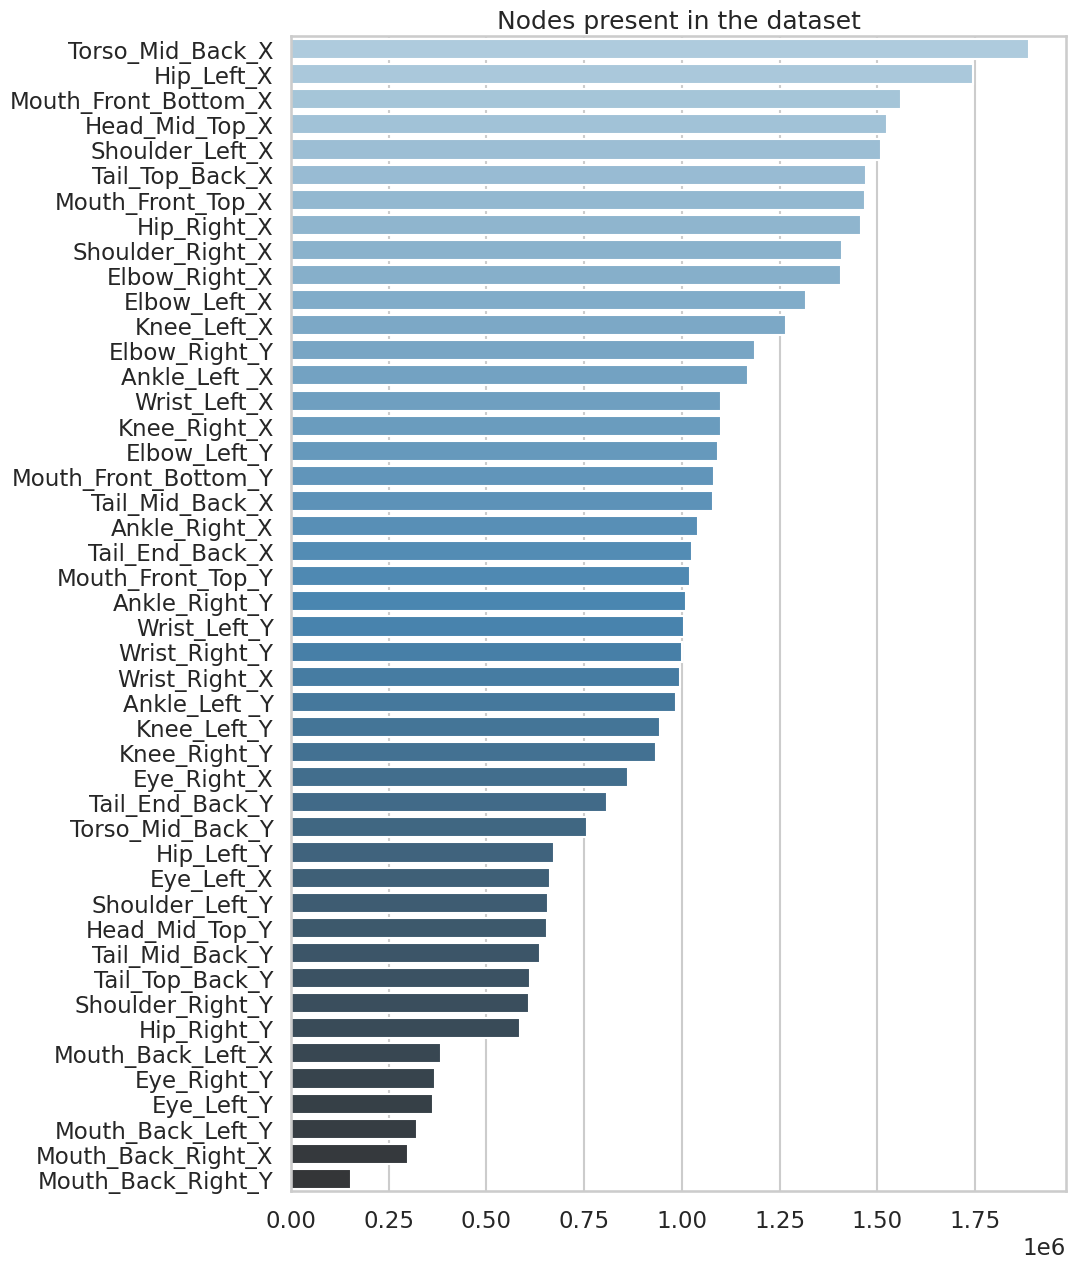

In [ ]:
sns.set_style("whitegrid") # Sets the graph style
sns.set_context("talk") # Creates a uniform font size
plt.figure(figsize=(10,15)) # Figure size
sns.barplot(y=Nodes.index, x=Nodes.values, palette="Blues_d") # Graph code
plt.title("Nodes present in the dataset") # Title
plt.show()

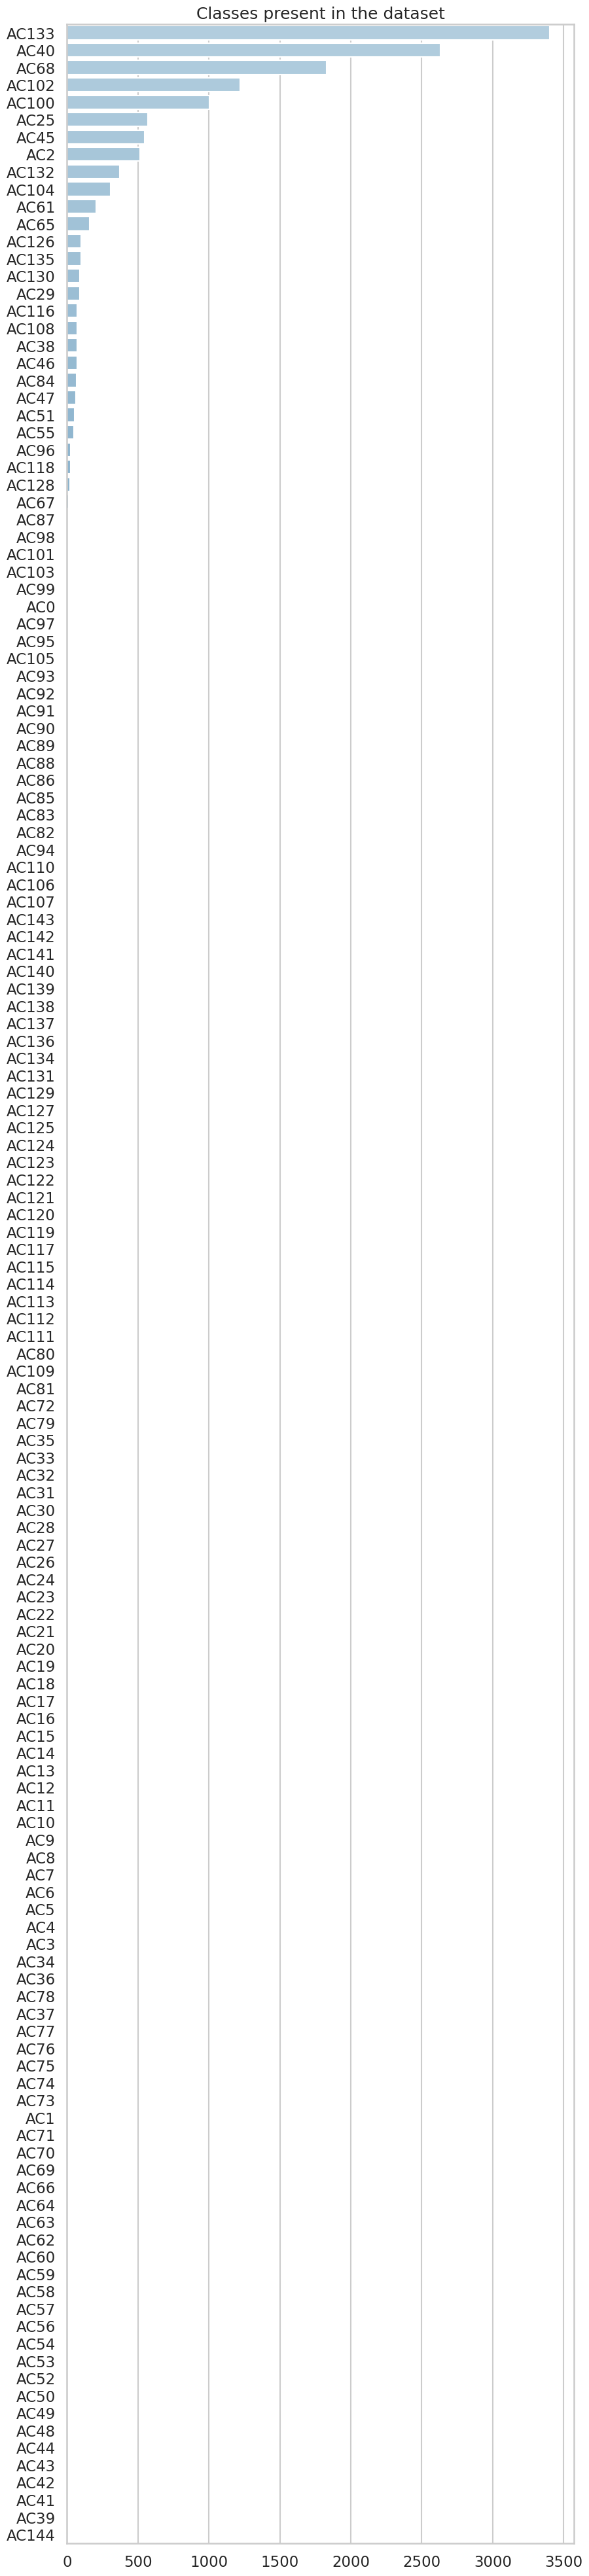

In [ ]:
sns.set_style("whitegrid") # Sets the graph style
sns.set_context("talk") # Creates a uniform font size
plt.figure(figsize=(10,50)) # Figure size
sns.barplot(y=DataClasses.index, x=DataClasses.values, palette="Blues_d") # Graph code
plt.title("Classes present in the dataset") # Title
plt.show()

##Old Try XGB Multiple Class

In [ ]:
X = df.drop(['AC133','AC40','AC55','AC30'], axis=1)

y = df[['AC133','AC40','AC55','AC30']]

In [ ]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape,X_test.shape

((829, 187), (208, 187))

In [ ]:
y_train.shape,y_test.shape

((829, 4), (208, 4))

In [ ]:
#Model pipeline
pipeline_xgb =Pipeline([('clf', MultiOutputClassifier(XGBClassifier()))])

In [ ]:
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('clf',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric=None,
                                                               feature_types=None,
                                                               gamma=None,
                                                               gpu_id=None,
                                                               grow_policy=None,
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None, ...)))])

In [ ]:
pred_xgb = pipeline_xgb.predict(X_test)

In [ ]:
pred_xgb

array([[1, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0,

In [ ]:
print('Train Aaccuracy = {0}%'.format(np.round(pipeline_xgb.score(X_train, y_train)*100,2)))

print('Test Aaccuracy = {0}%'.format(np.round(pipeline_xgb.score(X_test,y_test)*100,2)))

Train Aaccuracy = 100.0%
Test Aaccuracy = 99.04%


##Best Try XGB Model MultiClass

In [ ]:
Classes=[]
for i in range(48,193):
  Classes.append(df.columns[i])

Classes

['AC0',
 'AC1',
 'AC2',
 'AC3',
 'AC4',
 'AC5',
 'AC6',
 'AC7',
 'AC8',
 'AC9',
 'AC10',
 'AC11',
 'AC12',
 'AC13',
 'AC14',
 'AC15',
 'AC16',
 'AC17',
 'AC18',
 'AC19',
 'AC20',
 'AC21',
 'AC22',
 'AC23',
 'AC24',
 'AC25',
 'AC26',
 'AC27',
 'AC28',
 'AC29',
 'AC30',
 'AC31',
 'AC32',
 'AC33',
 'AC34',
 'AC35',
 'AC36',
 'AC37',
 'AC38',
 'AC39',
 'AC40',
 'AC41',
 'AC42',
 'AC43',
 'AC44',
 'AC45',
 'AC46',
 'AC47',
 'AC48',
 'AC49',
 'AC50',
 'AC51',
 'AC52',
 'AC53',
 'AC54',
 'AC55',
 'AC56',
 'AC57',
 'AC58',
 'AC59',
 'AC60',
 'AC61',
 'AC62',
 'AC63',
 'AC64',
 'AC65',
 'AC66',
 'AC67',
 'AC68',
 'AC69',
 'AC70',
 'AC71',
 'AC72',
 'AC73',
 'AC74',
 'AC75',
 'AC76',
 'AC77',
 'AC78',
 'AC79',
 'AC80',
 'AC81',
 'AC82',
 'AC83',
 'AC84',
 'AC85',
 'AC86',
 'AC87',
 'AC88',
 'AC89',
 'AC90',
 'AC91',
 'AC92',
 'AC93',
 'AC94',
 'AC95',
 'AC96',
 'AC97',
 'AC98',
 'AC99',
 'AC100',
 'AC101',
 'AC102',
 'AC103',
 'AC104',
 'AC105',
 'AC106',
 'AC107',
 'AC108',
 'AC109',
 'AC110',


In [ ]:
X=df.iloc[:,:-147]
#y=df[Classes]
y=df[['AC133','AC40','AC55','AC30','AC33','AC100']]

In [ ]:
X.shape , y.shape

((7810, 46), (7810, 6))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train

,Elbow_Left_X,Elbow_Left_Y,Mouth_Back_Left_X,Mouth_Back_Left_Y,Head_Mid_Top_X,Head_Mid_Top_Y,Mouth_Back_Right_X,Mouth_Back_Right_Y,Knee_Left_X,Knee_Left_Y,...,Tail_End_Back_X,Tail_End_Back_Y,Ankle_Left _X,Ankle_Left _Y,Torso_Mid_Back_X,Torso_Mid_Back_Y,Wrist_Left_X,Wrist_Left_Y,Hip_Right_X,Hip_Right_Y
678,340.906555,293.234009,-1.000000,-1.000000,540.464233,156.800125,549.809448,247.93251,109.190659,257.177124,...,88.899796,253.054611,105.127625,340.853577,288.982758,100.971680,329.316284,348.457031,176.720688,93.360809
2250,272.354523,260.947815,-1.000000,-1.000000,240.720734,140.882065,-1.000000,-1.00000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,284.423218,189.002090,-1.000000,-1.000000,304.389954,185.620132
7481,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,...,476.781555,131.792908,461.326080,212.741119,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
539,-1.000000,-1.000000,-1.000000,-1.000000,165.679199,65.277786,-1.000000,-1.00000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
7551,-1.000000,-1.000000,124.535294,220.526627,147.927841,116.842255,-1.000000,-1.00000,-1.000000,-1.000000,...,377.616638,272.527649,213.136581,348.808716,464.433777,132.909698,400.706848,360.873901,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,-1.000000,-1.000000,-1.000000,-1.000000,129.330231,88.219376,-1.000000,-1.00000,69.020569,120.679550,...,72.452637,111.535233,68.639404,132.652542,85.659180,76.344559,-1.000000,-1.000000,77.257324,80.374741
3264,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1653,89.314301,252.924088,-1.000000,-1.000000,169.261230,84.217529,-1.000000,-1.00000,76.833466,248.336227,...,36.921478,275.924072,84.492004,296.523804,-1.000000,-1.000000,-1.000000,-1.000000,89.114777,136.555420
2607,453.465393,328.338928,-1.000000,-1.000000,556.764038,184.645447,-1.000000,-1.00000,253.238129,300.674530,...,-1.000000,-1.000000,260.912170,355.525757,364.535126,167.906876,456.211304,356.619293,-1.000000,-1.000000


In [ ]:
X_test

,Elbow_Left_X,Elbow_Left_Y,Mouth_Back_Left_X,Mouth_Back_Left_Y,Head_Mid_Top_X,Head_Mid_Top_Y,Mouth_Back_Right_X,Mouth_Back_Right_Y,Knee_Left_X,Knee_Left_Y,...,Tail_End_Back_X,Tail_End_Back_Y,Ankle_Left _X,Ankle_Left _Y,Torso_Mid_Back_X,Torso_Mid_Back_Y,Wrist_Left_X,Wrist_Left_Y,Hip_Right_X,Hip_Right_Y
3032,280.046295,236.523087,129.094757,164.811142,-1.000000,-1.000000,-1.000000,-1.000000,392.792938,264.632935,...,469.107635,216.843613,-1.000000,-1.000000,336.761261,148.491058,-1.000000,-1.000000,-1.000000,-1.000000
5892,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,416.589905,136.155914,-1.000000,-1.000000,384.825439,132.870636
3149,263.620117,261.416016,163.875427,209.144608,172.023529,160.763382,-1.000000,-1.000000,380.031372,301.255615,...,-1.000000,-1.000000,392.106445,337.432373,303.963409,181.660141,-1.000000,-1.000000,-1.000000,-1.000000
5574,339.904144,292.813477,-1.000000,-1.000000,224.554962,224.156891,-1.000000,-1.000000,-1.000000,-1.000000,...,480.066223,340.966309,-1.000000,-1.000000,428.466919,144.527039,348.212372,332.504150,-1.000000,-1.000000
7487,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,500.122681,156.720627,367.795105,212.710526,...,-1.000000,-1.000000,400.240479,241.204147,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,251.849045,245.134323,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,284.716309,349.048828,-1.000000,-1.000000,164.778458,357.338806,160.475586,61.451401
7646,-1.000000,-1.000000,-1.000000,-1.000000,547.729004,148.978973,-1.000000,-1.000000,365.878784,173.056213,...,-1.000000,-1.000000,-1.000000,-1.000000,204.693054,104.236557,264.555573,188.874847,-1.000000,-1.000000
7314,-1.000000,-1.000000,-1.000000,-1.000000,255.994659,199.741470,-1.000000,-1.000000,431.492004,236.003983,...,-1.000000,-1.000000,420.157288,332.797668,404.468048,145.202332,-1.000000,-1.000000,415.937988,143.547684
5869,508.744965,232.001465,-1.000000,-1.000000,556.659546,148.212799,-1.000000,-1.000000,533.024719,176.472412,...,355.673645,236.014923,-1.000000,-1.000000,439.753784,132.697250,495.738861,257.003662,416.357788,136.561386


In [ ]:
X_train.shape,X_test.shape

((6248, 46), (1562, 46))

In [ ]:
y_train.shape,y_test.shape

((6248, 6), (1562, 6))

In [ ]:
param = {
    'learning_rate':0.05,
    'max_depth': 6,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softmax',  # training loss function used in error evaluation for multiclass training
    'num_class': 145, # number of classes in target variable
 'n_estimators':200, # number of trees
 'min_child_weight':1, # as high class imbalance
 'gamma':0,
 'subsample':0.8,
 'colsample_bytree':0.8}
param['eval_metric']="mlogloss"

In [ ]:
Model = Pipeline([('clf', MultiOutputClassifier(XGBClassifier(**param)))])

In [ ]:
Model.fit(X_train, y_train)

Pipeline(steps=[('clf',
                 MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                               booster=None,
                                                               callbacks=None,
                                                               colsample_bylevel=None,
                                                               colsample_bynode=None,
                                                               colsample_bytree=None,
                                                               early_stopping_rounds=None,
                                                               enable_categorical=False,
                                                               eval_metric=None,
                                                               feature_types=None,
                                                               gamma=None,
                                                               gpu_id=None,
                                                               grow_policy=None,
                                                               importance_type=None,
                                                               interaction_constraints=None,
                                                               learning_rate=None,
                                                               max_bin=None,
                                                               max_cat_threshold=None,
                                                               max_cat_to_onehot=None,
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               max_leaves=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None, ...)))])

In [ ]:
pred = Model.predict(X_test)

In [ ]:
pred

array([[1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [ ]:
for p in pred:
  print(p)

[1 0 0 0 0 0]
[1 1 0 0 0 0]
[1 0 0 0 0 0]
[0 0 0 0 0 0]
[1 1 0 0 0 0]
[1 0 0 0 0 0]
[0 1 0 0 0 0]
[0 0 0 0 0 1]
[0 0 0 0 0 0]
[1 0 0 0 0 0]
[0 0 0 0 0 1]
[0 1 0 0 0 0]
[0 1 0 0 0 0]
[0 0 0 0 0 1]
[0 0 0 0 0 0]
[1 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 1]
[1 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 1]
[0 0 0 0 0 0]
[1 0 0 0 0 0]
[0 1 0 0 0 0]
[0 1 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[0 0 0 0 0 1]
[0 0 0 0 0 0]
[0 0 0 0 0 1]
[0 1 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[0 1 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 1]
[1 1 0 0 0 0]
[1 0 0 0 0 0]
[0 1 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0]
[1 1 0 0 0 0]
[1 1 0 0 0 0]
[1 1 0 0 0 0]
[1 0 0 0 0 0]
[1 0 0 0 0 0]
[1 1 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 1]
[0 1 0 0 0 0]
[1 0 0 0 0 0]
[0 1 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 1]
[0 1 0 0 0 0]
[0 1 0 0 0 0]
[1 0 0 0 0 0]
[0 0 0 0 0 0]
[0 1 0 0 0 0]
[1 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 1]
[1 0 0 0 0 0]
[0 0 0 0 0 1]
[0 1 0 0 0 0]
[1 0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 1]
[0 0 0 0 0 0]
[1 1 0 0 0 0]
[0 0 0 0 0 0]
[0 1 0

In [ ]:
print('Train Accuracy = {0}%'.format(np.round(Model.score(X_train, y_train)*100,2)))

print('Test Accuracy = {0}%'.format(np.round(Model.score(X_test,y_test)*100,2)))

Train Accuracy = 99.76%
Test Accuracy = 91.68%


In [ ]:
#showing classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       668
           1       0.98      0.98      0.98       536
           2       1.00      0.14      0.25         7
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.95      0.75      0.84       194

   micro avg       0.96      0.93      0.94      1405
   macro avg       0.64      0.47      0.50      1405
weighted avg       0.96      0.93      0.94      1405
 samples avg       0.70      0.70      0.70      1405



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

## Demo

In [ ]:
#data='/content/drive/MyDrive/DemoPoseAndClassifier/Demo.csv'
data='/content/drive/MyDrive/COCOHorseSleapPose/Updata.csv'
df2 = pd.read_csv(data)

In [ ]:
DataClasses2 = df2.iloc[:,48:].T.sum(axis=1).sort_values(ascending=False).copy()

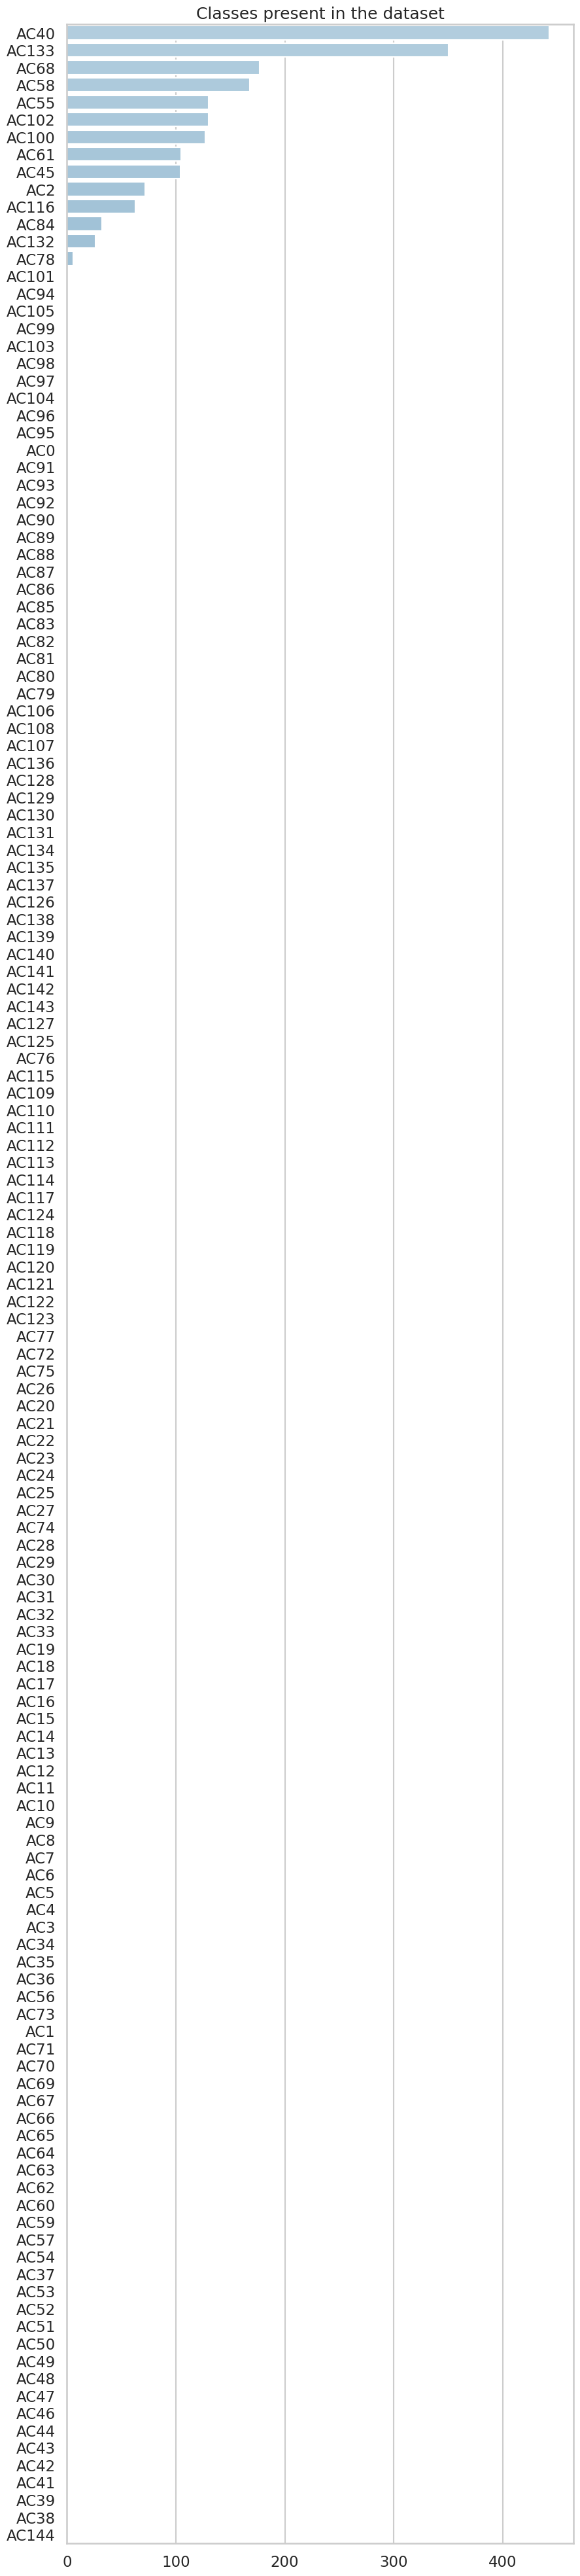

In [ ]:
sns.set_style("whitegrid") # Sets the graph style
sns.set_context("talk") # Creates a uniform font size
plt.figure(figsize=(10,50)) # Figure size
sns.barplot(y=DataClasses2.index, x=DataClasses2.values, palette="Blues_d") # Graph code
plt.title("Classes present in the dataset") # Title
plt.show()

In [ ]:
df2.shape

(1037, 193)

In [ ]:
X_test2=df2.iloc[:,:-147]
X_test2.shape

(1037, 46)

In [ ]:
X_test2

,Elbow_Left_X,Elbow_Left_Y,Mouth_Back_Left_X,Mouth_Back_Left_Y,Head_Mid_Top_X,Head_Mid_Top_Y,Mouth_Back_Right_X,Mouth_Back_Right_Y,Knee_Left_X,Knee_Left_Y,...,Tail_End_Back_X,Tail_End_Back_Y,Ankle_Left _X,Ankle_Left _Y,Torso_Mid_Back_X,Torso_Mid_Back_Y,Wrist_Left_X,Wrist_Left_Y,Hip_Right_X,Hip_Right_Y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,552.346558,197.129211,...,NaN,NaN,564.281006,221.618042,405.100739,90.036453,NaN,NaN,413.137329,88.146378
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,552.168823,197.092896,...,NaN,NaN,560.907593,220.193634,405.126221,89.464828,NaN,NaN,409.586212,87.144913
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,557.471008,220.740875,403.890869,90.095901,NaN,NaN,412.404358,88.234253
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,556.078735,219.874069,400.810394,91.881516,NaN,NaN,411.996368,87.791702
4,NaN,NaN,NaN,NaN,557.099548,105.430542,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,396.623108,91.853989,NaN,NaN,408.733063,88.228653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,348.048706,180.727097,NaN,NaN,NaN,NaN
1033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,381.296326,155.955765,NaN,NaN,424.139709,147.963638
1034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,288.661011,189.977097,NaN,NaN,NaN,NaN
1035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,612.429321,344.14682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#y_test2=df2[Classes]
y_test2=df2[['AC133','AC40','AC55','AC30','AC33','AC100']]
y_test2.shape

(1037, 6)

In [ ]:
y_test2

,AC133,AC40,AC55,AC30,AC33,AC100
0,1,1,0,0,0,0
1,1,1,0,0,0,0
2,1,1,0,0,0,0
3,1,1,0,0,0,0
4,1,1,0,0,0,0
...,...,...,...,...,...,...
1032,0,0,0,0,0,1
1033,0,0,0,0,0,1
1034,0,0,0,0,0,1
1035,0,0,0,0,0,1


In [ ]:
X_test2.isnull().sum().sum()

27616

In [ ]:
X_test2=X_test2.fillna(value=-1)

In [ ]:
X_test2.isnull().sum().sum()

0

In [ ]:
X_test2.head()

,Elbow_Left_X,Elbow_Left_Y,Mouth_Back_Left_X,Mouth_Back_Left_Y,Head_Mid_Top_X,Head_Mid_Top_Y,Mouth_Back_Right_X,Mouth_Back_Right_Y,Knee_Left_X,Knee_Left_Y,...,Tail_End_Back_X,Tail_End_Back_Y,Ankle_Left _X,Ankle_Left _Y,Torso_Mid_Back_X,Torso_Mid_Back_Y,Wrist_Left_X,Wrist_Left_Y,Hip_Right_X,Hip_Right_Y
0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,552.346558,197.129211,...,-1.0,-1.0,564.281006,221.618042,405.100739,90.036453,-1.0,-1.0,413.137329,88.146378
1,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,552.168823,197.092896,...,-1.0,-1.0,560.907593,220.193634,405.126221,89.464828,-1.0,-1.0,409.586212,87.144913
2,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,-1.0,-1.0,557.471008,220.740875,403.890869,90.095901,-1.0,-1.0,412.404358,88.234253
3,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,...,-1.0,-1.0,556.078735,219.874069,400.810394,91.881516,-1.0,-1.0,411.996368,87.791702
4,-1.0,-1.0,-1.0,-1.0,557.099548,105.430542,-1.0,-1.0,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-1.000000,396.623108,91.853989,-1.0,-1.0,408.733063,88.228653


In [ ]:
pred2 = Model.predict(X_test2)

In [ ]:
count=0
tot=0
for p2 in pred2 :
  if p2[0]==1:
    count+=1
  tot+=1
  #print(p2[133])

print('\n ',count)
print('\n ',tot)


  436

  614


In [ ]:
print('Train Accuracy = {0}%'.format(np.round(Model.score(X_train, y_train)*100,2)))

print('Test Accuracy = {0}%'.format(np.round(Model.score(X_test2,y_test2)*100,2)))

Train Accuracy = 99.76%
Test Accuracy = 36.93%


In [ ]:
#showing classification report
print(metrics.classification_report(y_test2, pred2))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62       350
           1       0.74      0.15      0.25       443
           2       0.33      0.01      0.02       130
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.55      0.33      0.41       127

   micro avg       0.67      0.29      0.41      1050
   macro avg       0.38      0.17      0.22      1050
weighted avg       0.65      0.29      0.36      1050
 samples avg       0.24      0.22      0.23      1050



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test2, pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 36.93%


## other

Accuracy: 92.79%


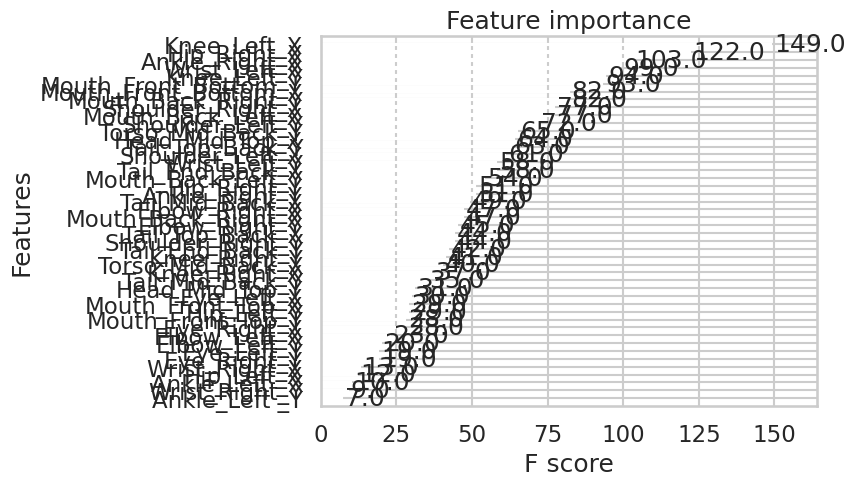

In [ ]:
from xgboost import plot_importance
from xgboost import plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#for i in y_pred:
#  print(i)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

plot_importance(model)
plt.show()


In [ ]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

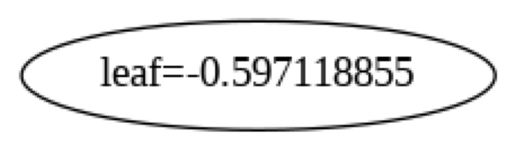

In [ ]:
plot_tree(model)
plt.show()